# Micro_Credit Loan Prediction

Introduction

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donorsare supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They arecollaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.



Feature Description


- **label** : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- **msisdn** : mobile number of user
- **aon** : age on cellular network in days
- **daily_decr30** : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- **daily_decr90** : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- **rental30** : Average main account balance over last 30 days
- **rental90** : Average main account balance over last 90 days
- **last_rech_date_ma** : Number of days till last recharge of main account
- **last_rech_date_da**: Number of days till last recharge of data account
- **last_rech_amt_ma** : Amount of last recharge of main account (in Indonesian Rupiah)
- **cnt_ma_rech30** : Number of times main account got recharged in last 30 days
- **fr_ma_rech30** : Frequency of main account recharged in last 30 days
- **sumamnt_ma_rech30** : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- **medianamnt_ma_rech30** : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- **medianmarechprebal30** : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- **cnt_ma_rech90** : Number of times main account got recharged in last 90 days
- **fr_ma_rech90** : Frequency of main account recharged in last 90 days
- **sumamnt_ma_rech90** : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- **medianamnt_ma_rech90** : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- **medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **cnt_da_rech30** : Number of times data account got recharged in last 30 days
- **fr_da_rech30**: Frequency of data account recharged in last 30 days
- **cnt_da_rech90** : Number of times data account got recharged in last 90 days
- **fr_da_rech90** : Frequency of data account recharged in last 90 days
- **cnt_loans30** : Number of loans taken by user in last 30 days
- **amnt_loans30** : Total amount of loans taken by user in last 30 days
- **maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days
- **medianamnt_loans30** : Median of amounts of loan taken by the user in last 30 days
- **cnt_loans90** : Number of loans taken by user in last 90 days
- **amnt_loans90** : Total amount of loans taken by user in last 90 days
- **maxamnt_loans90** : maximum amount of loan taken by the user in last 90 days
- **medianamnt_loans90** : Median of amounts of loan taken by the user in last 90 days
- **payback30** : Average payback time in days over last 30 days
- **payback90** : Average payback time in days over last 90 days
- **pcircle** : telecom circle
- **pdate** : date

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data 
df=pd.read_csv('Loan_file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(209593, 36)

In [5]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# Checking Null Values

In [7]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values present,we can proceed further.

In [8]:
# Converting Date datatypes and spliting date into date, month and year.
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12,0.0,0.000000,0.000000,UPW,2016-10-08,8,10,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [9]:
#Droping pdate column after extraction
df.drop(['pdate'],axis=1,inplace=True)
df.drop(['Year'],axis=1,inplace=True)

In [10]:
df.duplicated().sum() # This will check the duplicate data for all columns.

1

In [11]:
df.duplicated('msisdn').sum()  # This will check the duplicate data for all columns.

23350

**There 23350 rows with duplicate mobile number.** 
- **There 1 row with completely duplicate values of all features.**

**Training model on duplicate data will inflate accuracy model and additional it will increase computational resources consumption and computational time</u>.**

- ***For eariler 23350 entry it can possible that same mobile number is switch to other customer and another observation is for these duplicate entries features values are different.***

- ***We will drop 1 row duplicate entry before going further.***

In [12]:
# Droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [13]:
df.shape

(209592, 37)

In [14]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,...,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.380399,5381.412999,6082.529123,2692.578912,3483.407309,3755.865715,3712.220632,2064.458973,3.978053,...,274.660029,0.054029,18.520988,23.645397,6.703138,0.046078,3.398639,4.321302,14.583968,6.612251
std,0.330519,75696.261220,9220.644093,10918.836919,4308.596841,5770.475034,53906.020204,53374.960144,2370.790003,4.256099,...,4245.274734,0.218039,224.797957,26.469924,2.103869,0.200692,8.813330,10.307791,7.953394,2.371945
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1469.091834,1500.000000,1083.540000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7244.096000,7802.795000,3356.945000,4201.792500,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,8.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,...,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,12.000000


In [15]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
label,209592.000000,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209592.000000,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.000000,999860.755200
daily_decr30,209592.000000,5381.412999,9220.644093,-93.012667,42.439500,1469.091834,7244.096000,265926.000000
daily_decr90,209592.000000,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.795000,320630.000000
rental30,209592.000000,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.945000,198926.110000
rental90,209592.000000,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.792500,200148.110000
last_rech_date_ma,209592.000000,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.000000,998650.377700
last_rech_date_da,209592.000000,3712.220632,53374.960144,-29.000000,0.000000,0.000000,0.000000,999171.809400
last_rech_amt_ma,209592.000000,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209592.000000,3.978053,4.256099,0.000000,1.000000,3.000000,5.000000,203.000000


# Observation:
- **For all features value of mean is greater than median, indicating skewness in features.**
- **All data belong to year 2016. We can drop year column.**
- **pcircle contain single unique value UPW, so we can drop this feature.**
- **The features aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, cnt_da_rech30, fr_da_rech30, last_rech_amt_ma, maxamnt_loans30, cnt_loans90, payback30, payback90 contain outliers as there are lot difference in max columns and 75% columns.**
- **aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, medianmarechprebal90, medianmarechprebal30 features contain negative values in minimum column.**
- **Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.**

# Data Cleaning

In [16]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

# EDA-Exploratory Data Analysis

In [17]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

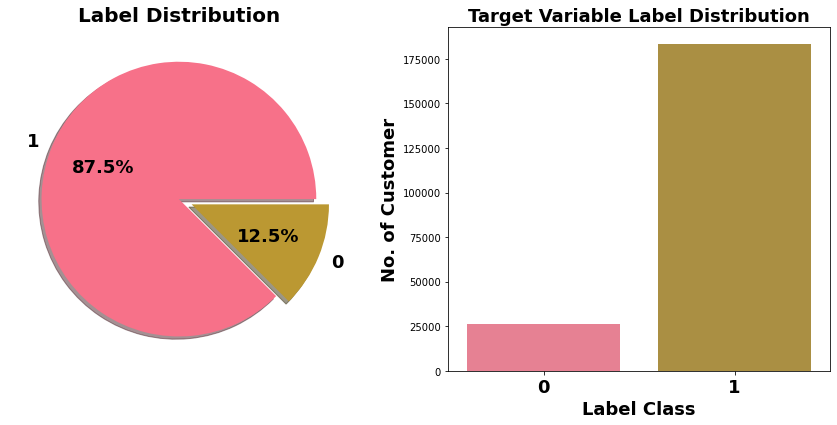

In [18]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Label Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Target Variable Label Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

-**Label class 1 represent Non-defaulter while Label class 0 represent Defaulter i.e. Loan not paid**
- **We can see Most of customers are Non-defaulter while very few are defaulter.**
- **From ML model building point of view target variable is imbalanced data case.**

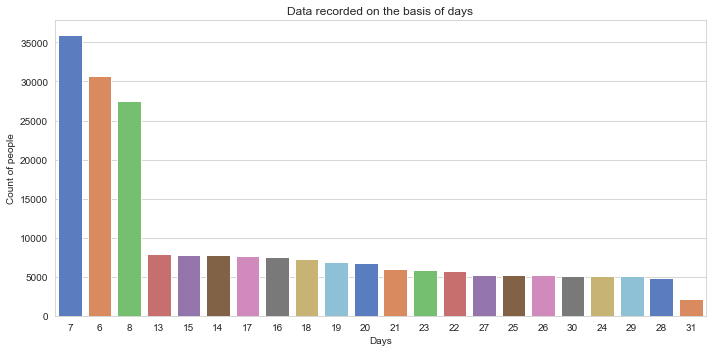

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Day',data=df,palette='muted',order= df['Day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

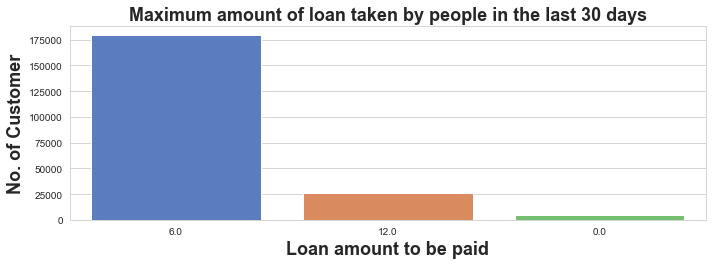

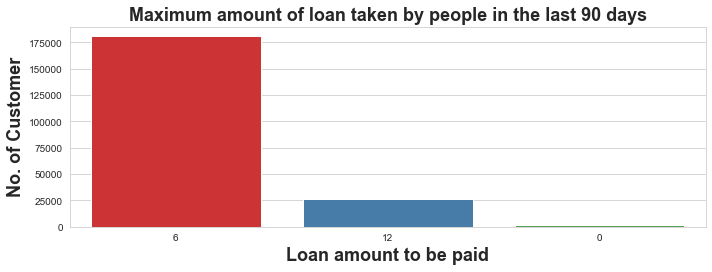

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64


6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [20]:
#Maximum amount of loan taken by people in last 30 and 90 days
plt.figure(figsize = (10,10))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans30'].value_counts())
print('\n')
print(df['maxamnt_loans90'].value_counts())

### Observations:

1. In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the  number of people had not taken loan and their number is 4291.

2. In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

3. Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26605 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.
**This means customer mostly opt for 6 Rs Loan.**

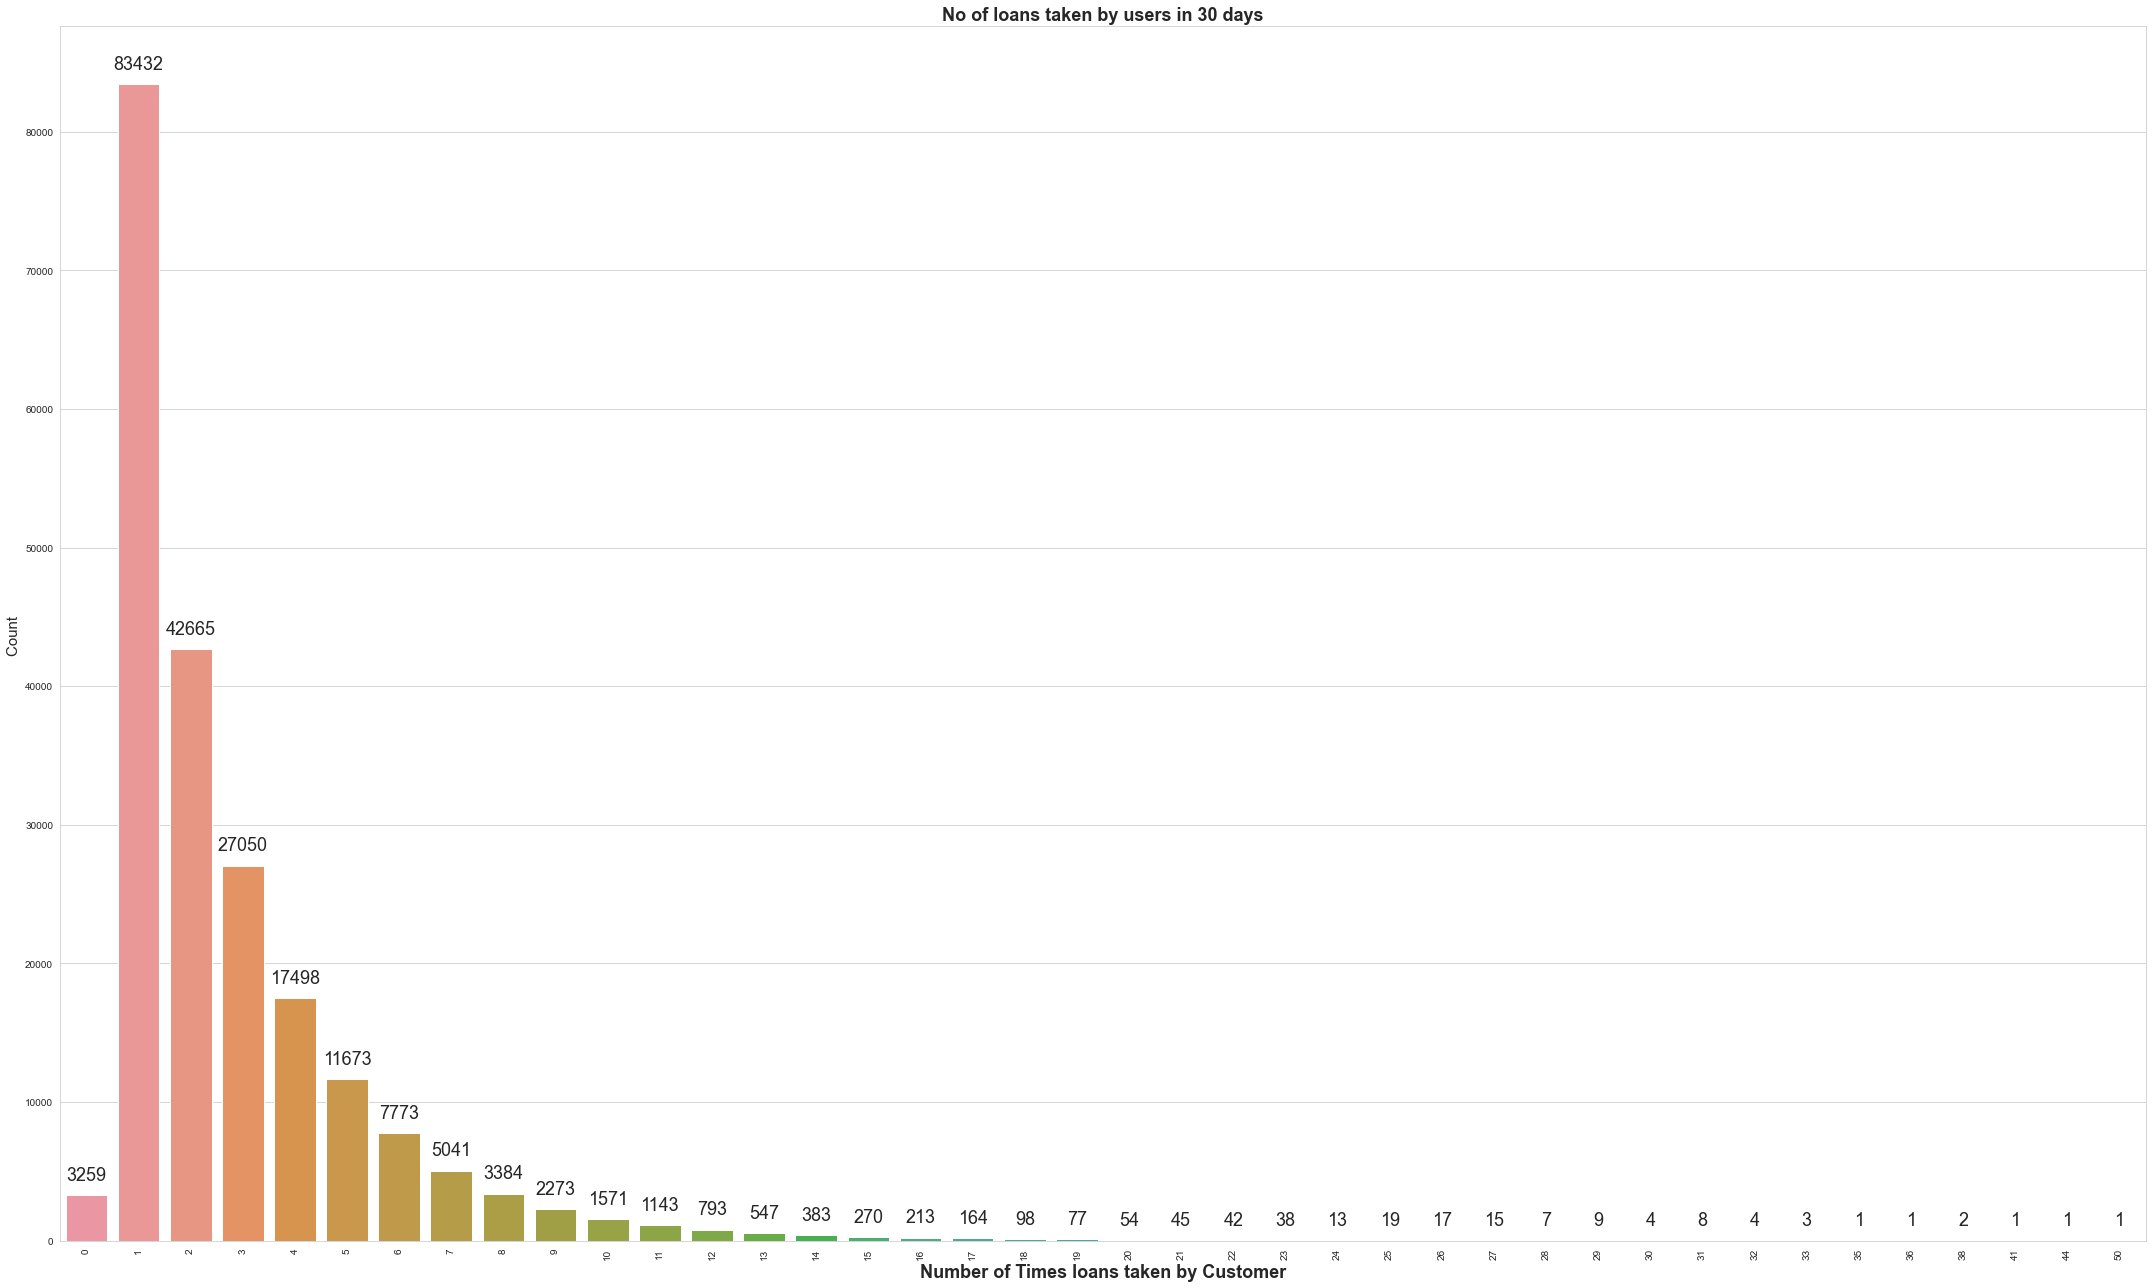

In [21]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

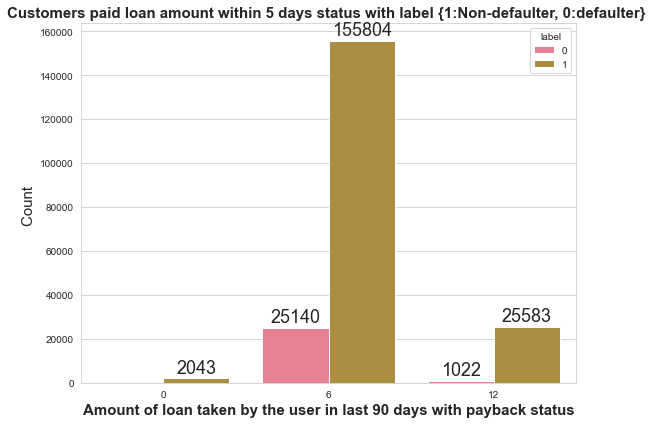

In [22]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

Very few defaulter in customers who take loan in amount of 12

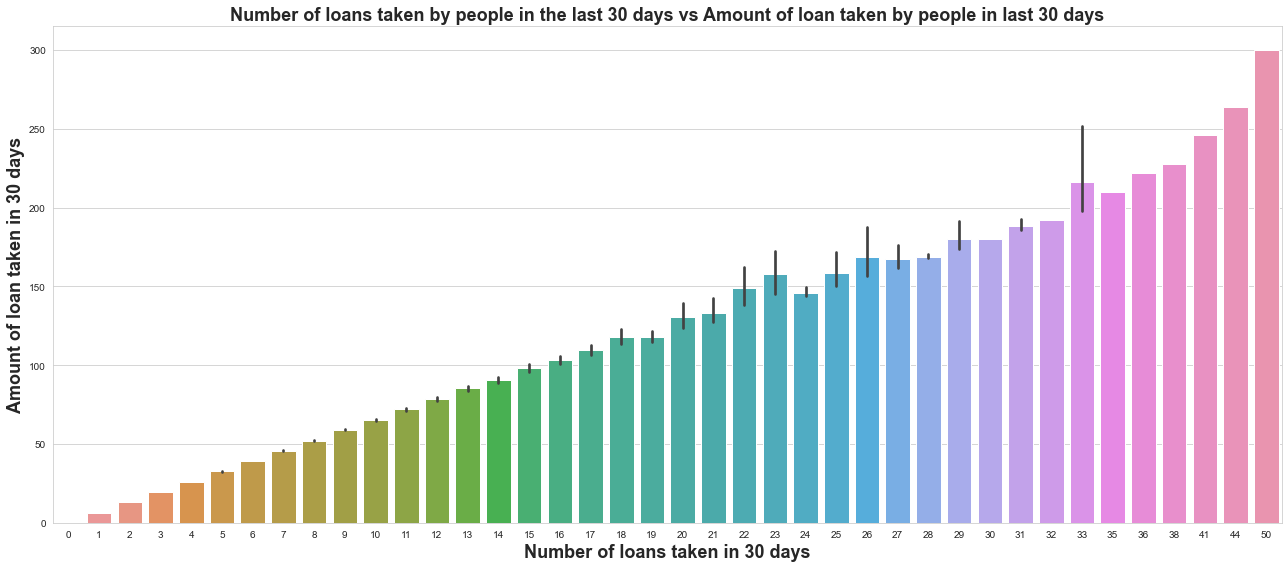

In [23]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Amount of loan taken in 30 days',fontsize=18,fontweight ='bold')
plt.show()

Maximum number of loans taken by the people is 50 and the Average loan amount is equivalent to 300.**

- **Minimum number of loans taken by the people is 0.

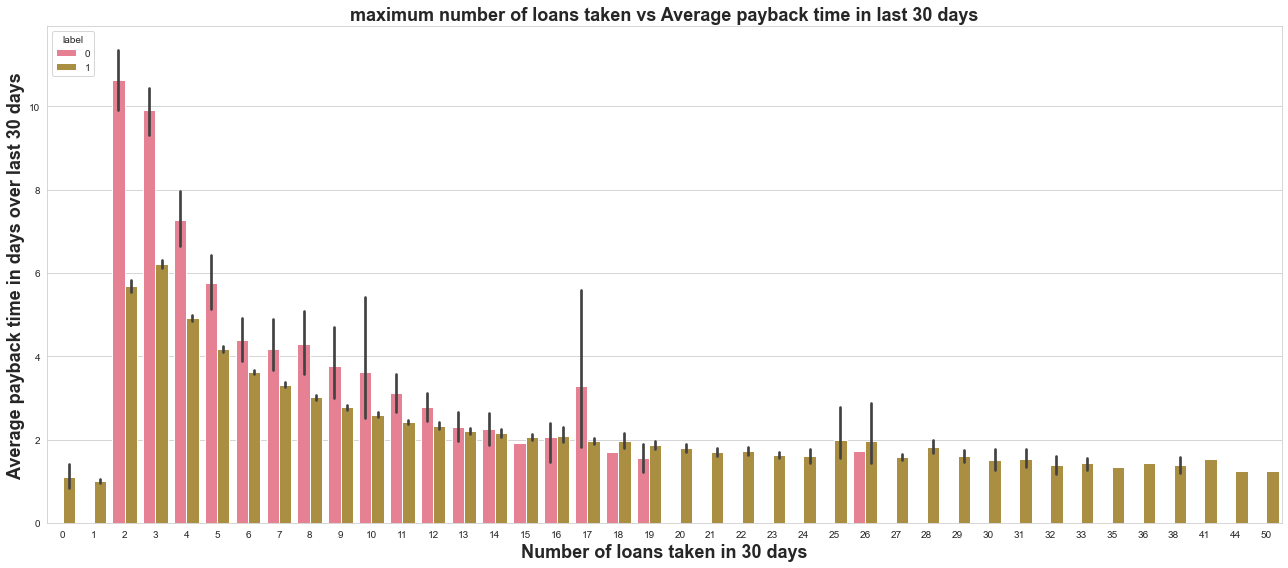

In [24]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Average payback time in days over last 30 days',fontsize=18,fontweight ='bold')
plt.show()

**We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters**


# Feature Enginnering

In [25]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle']}

In [26]:
#Droping PCircle and msisdn column as they are unnecessary for further investigation
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

# 1.Outliers Detection and Removal

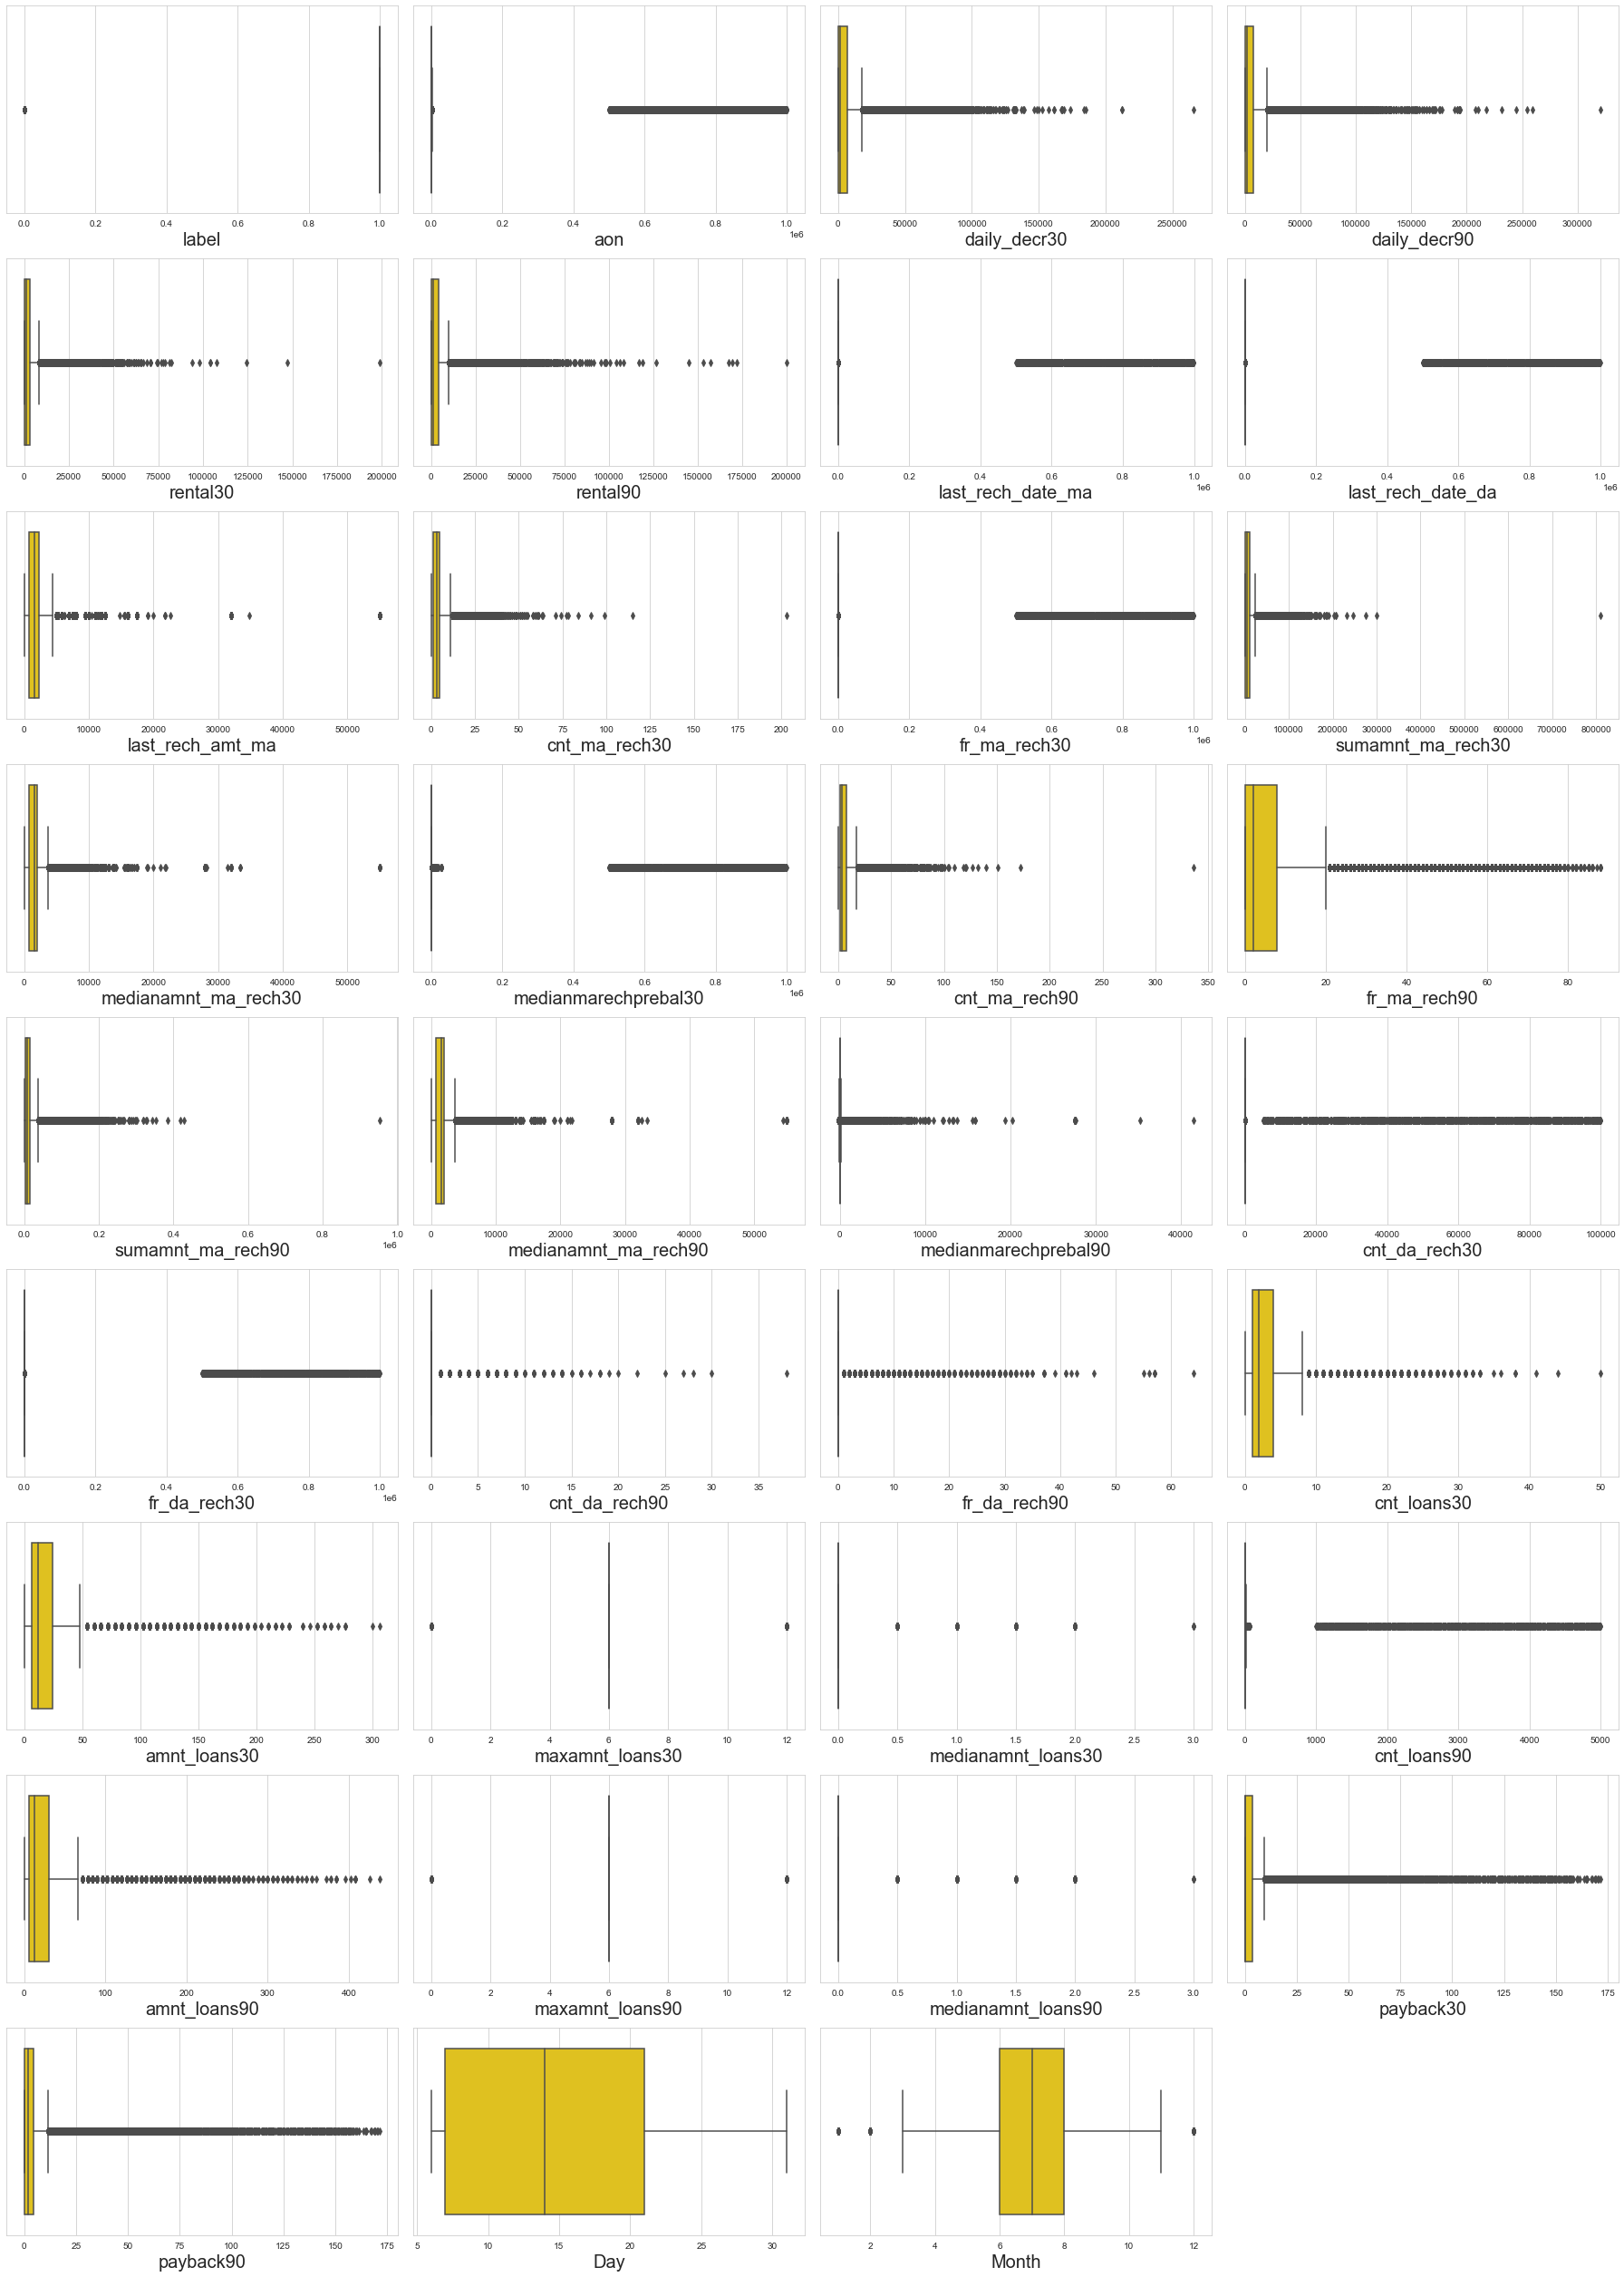

In [27]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**From Boxplot outliers exist in dataset.**

# Outliers removal using Zscore method

In [28]:
df1=df.copy()

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (209592, 35)
Shape of the dataframe after removing outliers:  (160499, 35)
Percentage of data loss post outlier removal:  23.42312683690217


# 2.Skewness of features

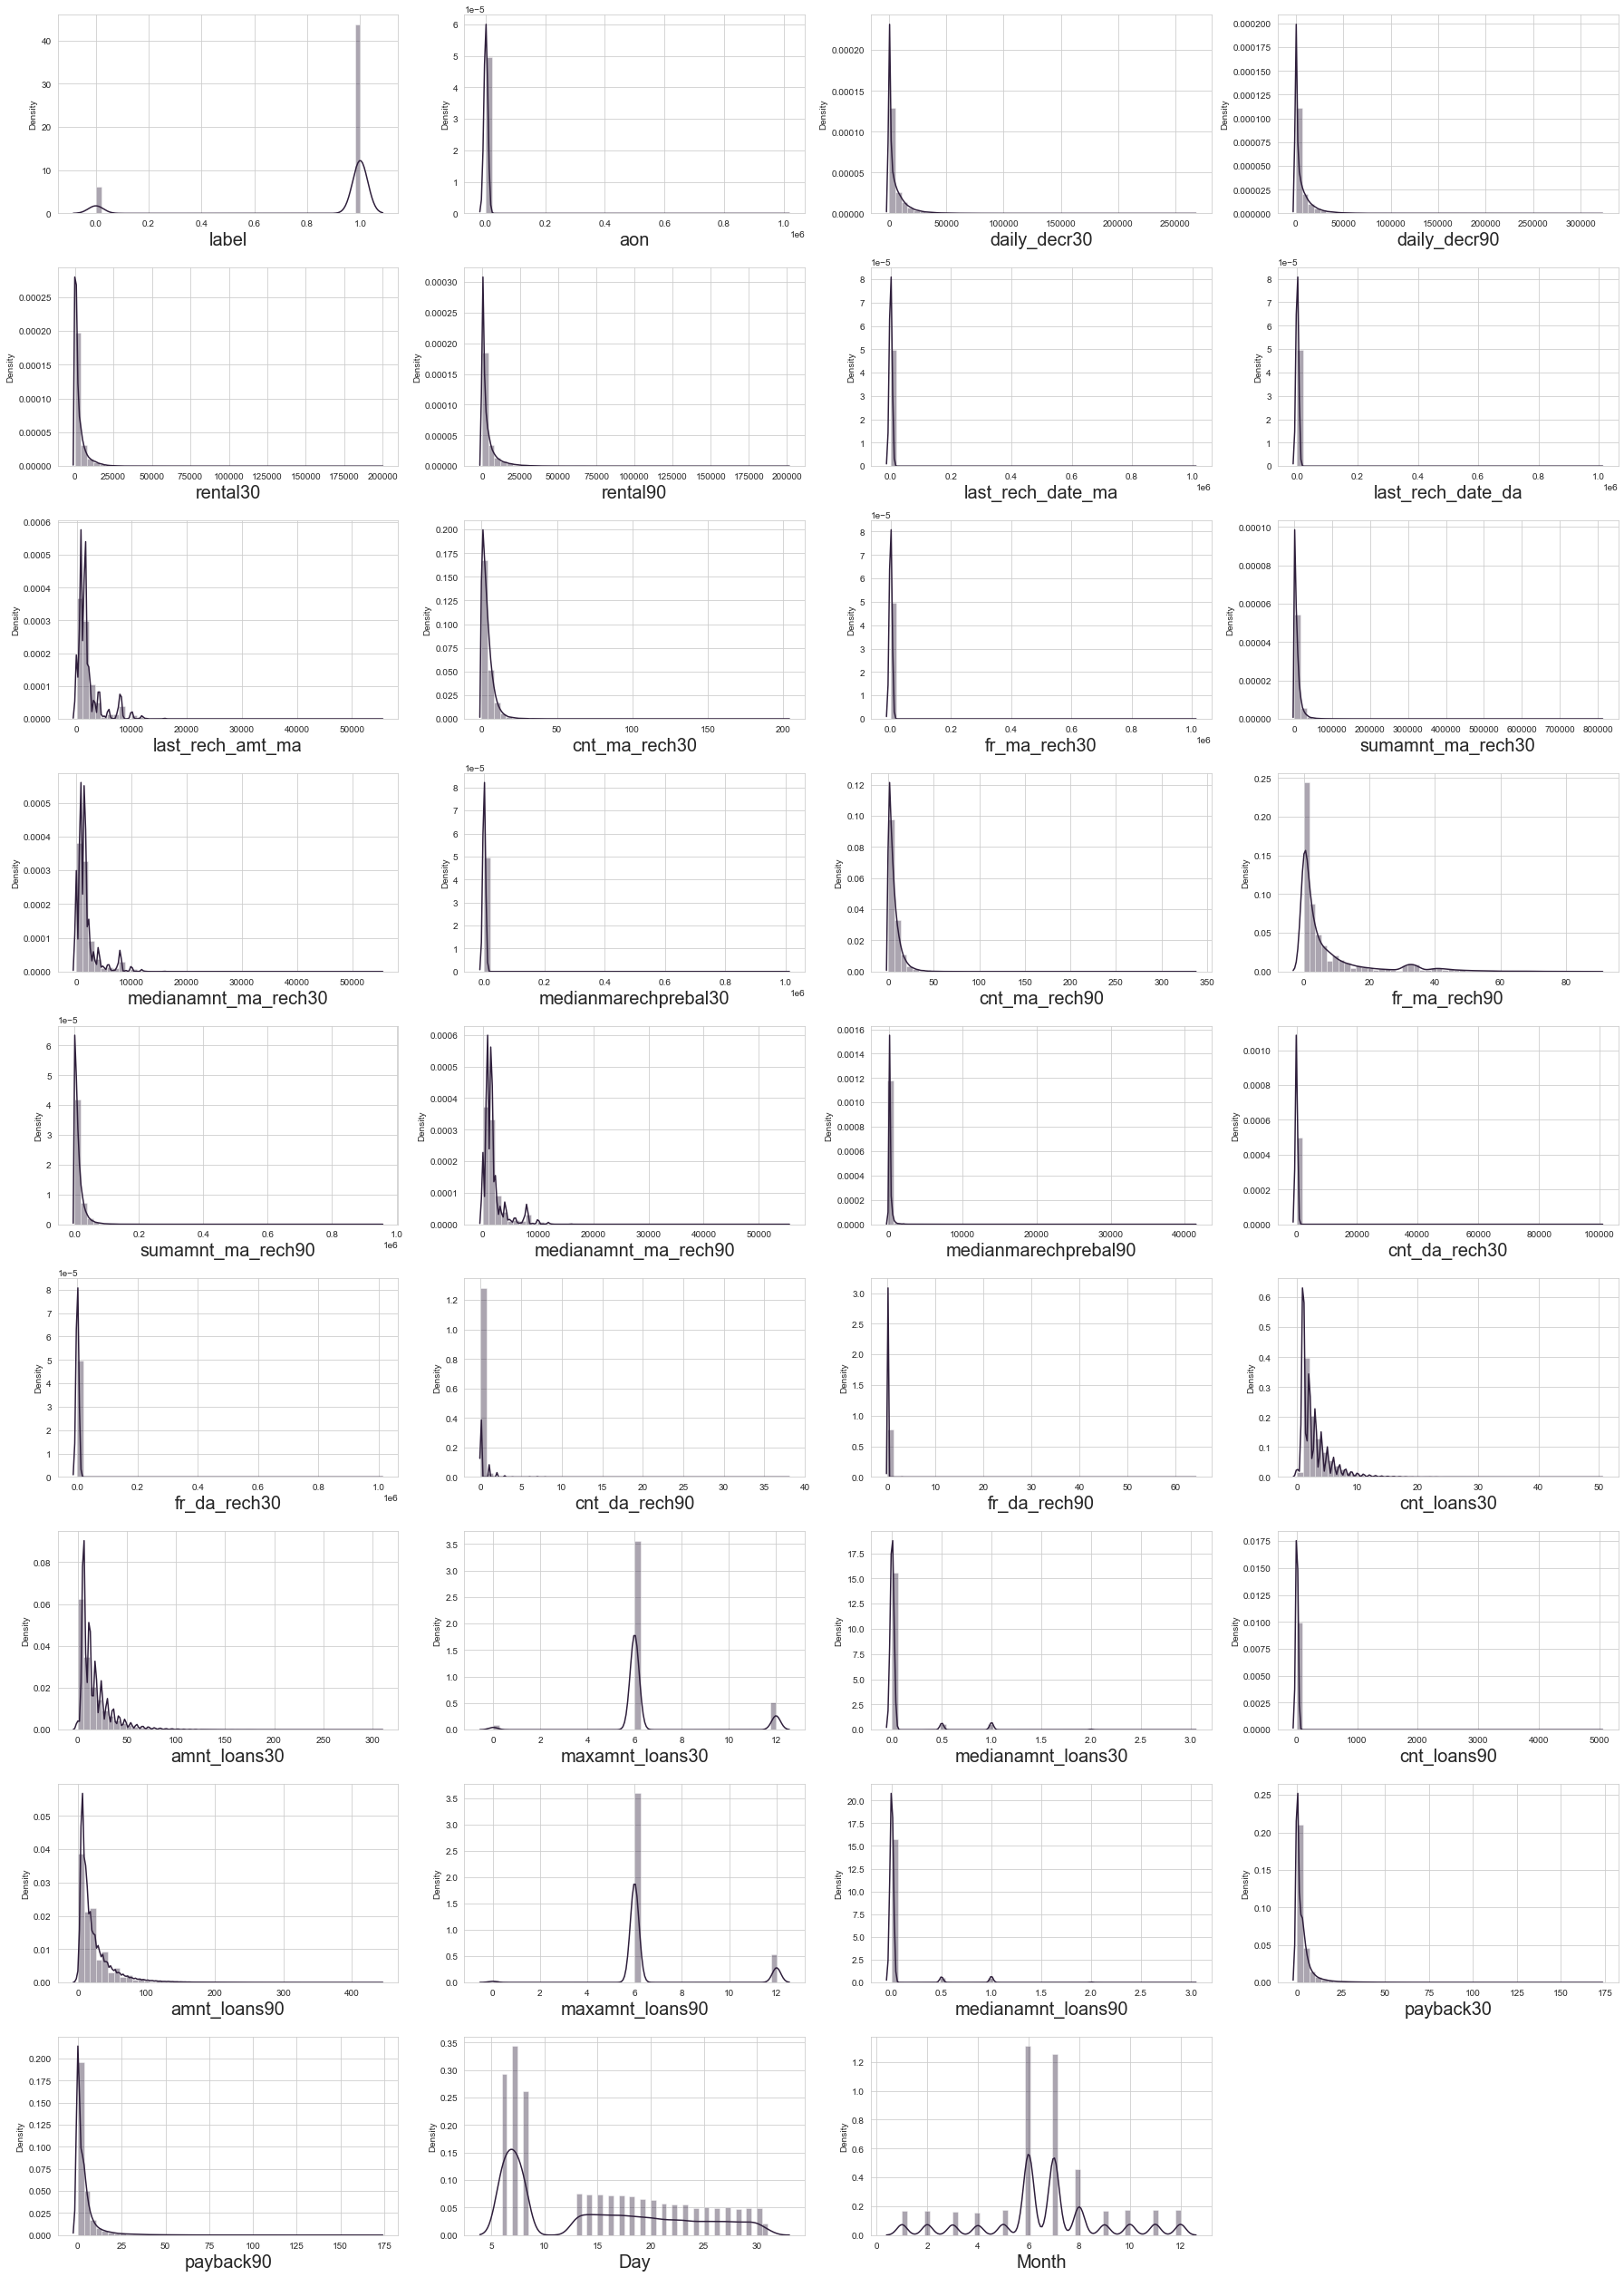

In [30]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
sns.set_palette('mako')
for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [31]:
df.skew()

label                   -2.270245
aon                     10.392926
daily_decr30             3.946235
daily_decr90             4.252567
rental30                 4.560502
rental90                 4.467271
last_rech_date_ma       14.790939
last_rech_date_da       14.814821
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285415
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    44.880396
cnt_da_rech30           17.818321
fr_da_rech30            14.776395
cnt_da_rech90           27.267213
fr_da_rech90            28.988013
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30          1.241873
medianamnt_loans30       4.551031
cnt_loans90             16.594368
amnt_loans90             3.149999
maxamnt_loans9

In [32]:
# Droping unncessary column
df.drop(['fr_da_rech30'],axis=1,inplace=True)

In [33]:
 #Droping unncessary column
df.drop(['fr_da_rech90'],axis=1,inplace=True)

All features are skew except few one like day, month, fr_da_rech90,fr_da_rech30.**

**We will use PowerTransformer to transform skewness in features.**

**We will not perform on label as it is our Target Variable.**

In [34]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [36]:
df[skew_fea] = scaler.fit_transform(df[skew_fea].values)

In [37]:
df.skew()

label                  -2.270245
aon                    -0.298535
daily_decr30           -0.130634
daily_decr90           -0.120625
rental30               -0.040536
rental90               -0.041326
last_rech_date_ma       0.012081
last_rech_date_da       5.307305
last_rech_amt_ma       -0.061266
cnt_ma_rech30          -0.000144
fr_ma_rech30            0.165014
sumamnt_ma_rech30      -0.291322
medianamnt_ma_rech30   -0.189630
medianmarechprebal30   -0.119068
cnt_ma_rech90          -0.002465
fr_ma_rech90            0.142950
sumamnt_ma_rech90      -0.192160
medianamnt_ma_rech90   -0.044606
medianmarechprebal90    7.506249
cnt_da_rech30           6.925803
cnt_da_rech90           6.006561
cnt_loans30             0.036243
amnt_loans30            0.001947
maxamnt_loans30         0.422680
medianamnt_loans30      3.447725
cnt_loans90             0.105583
amnt_loans90           -0.008989
maxamnt_loans90         0.364281
medianamnt_loans90      3.779587
payback30               0.298562
payback90 

Skewness of most of features is reduced

# 3. Corrleation

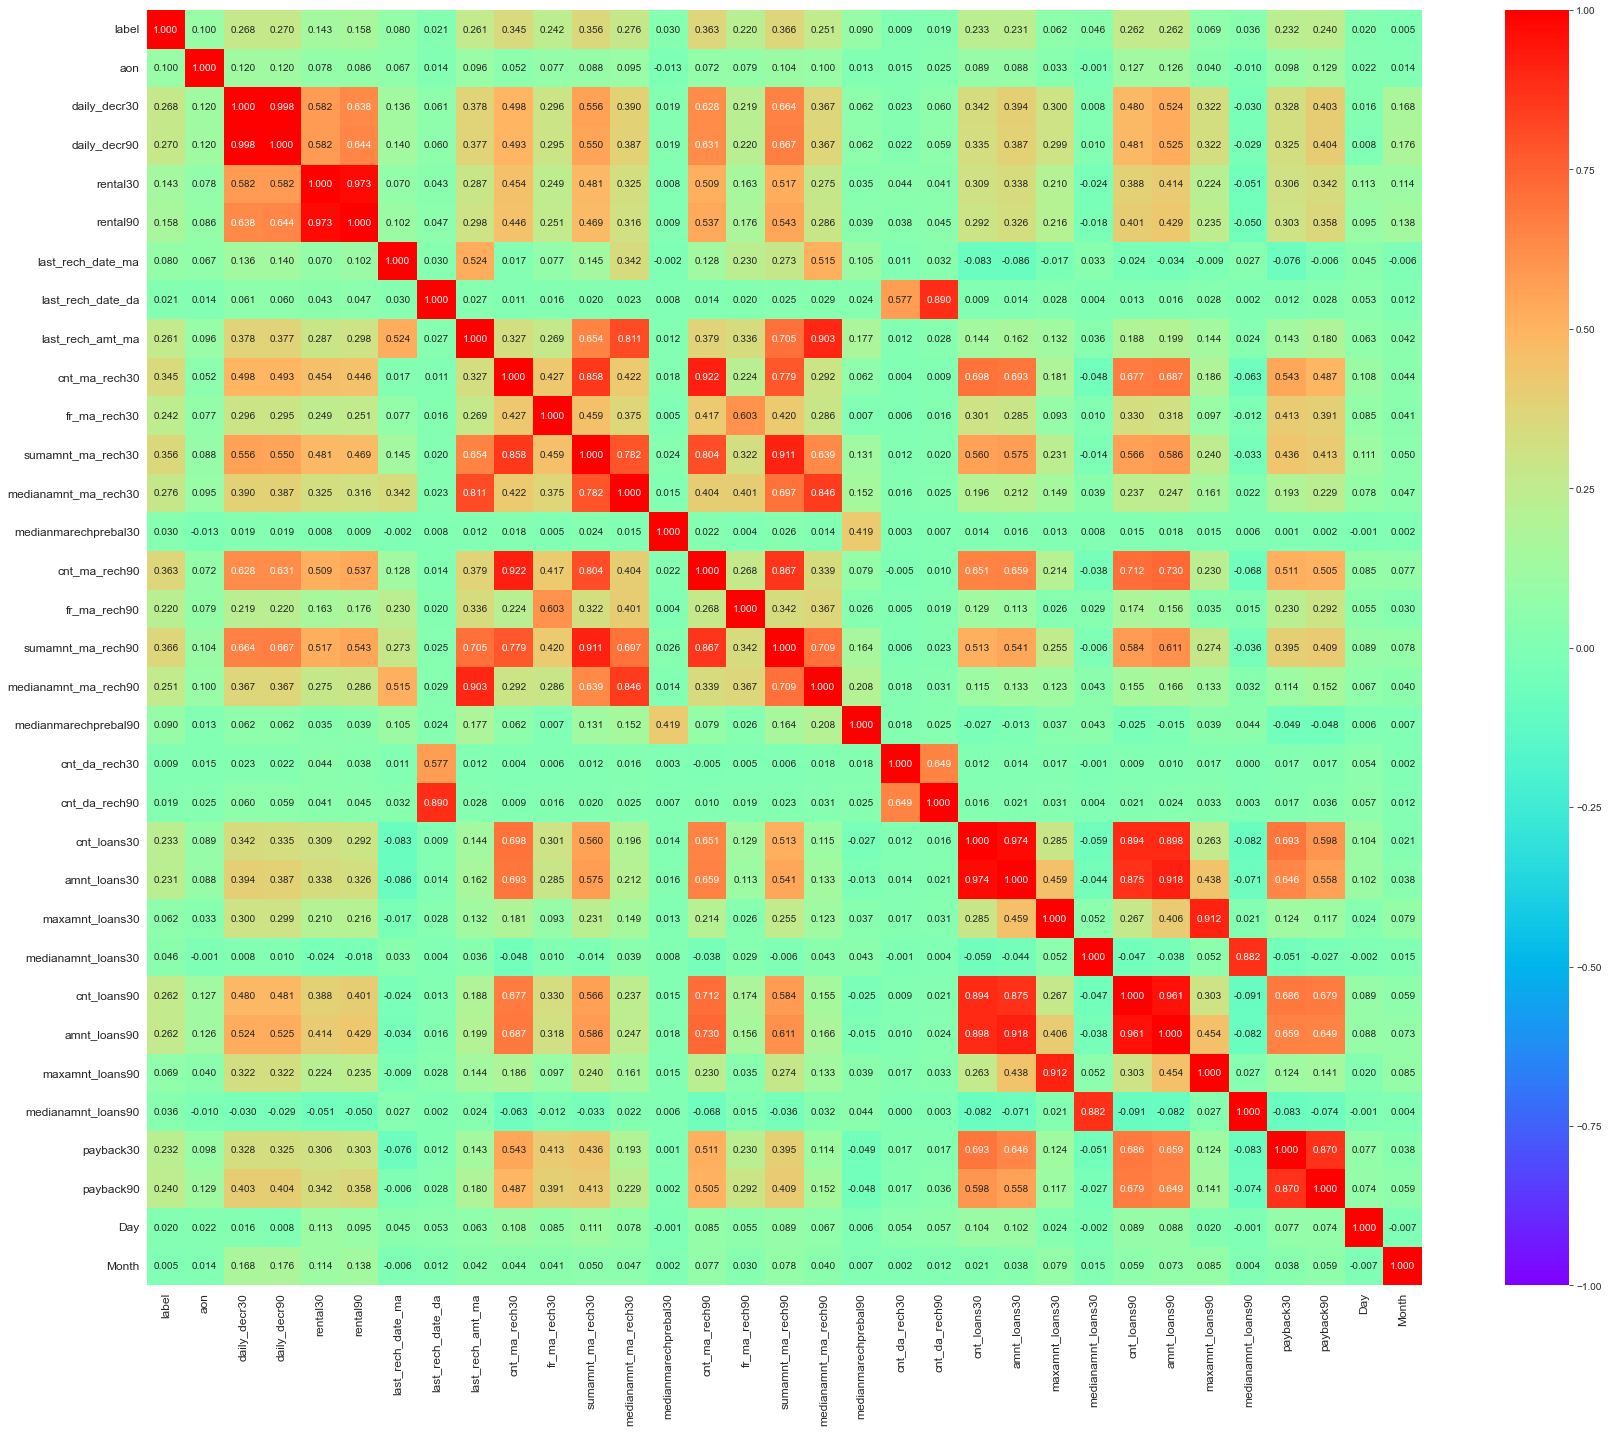

In [38]:
df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

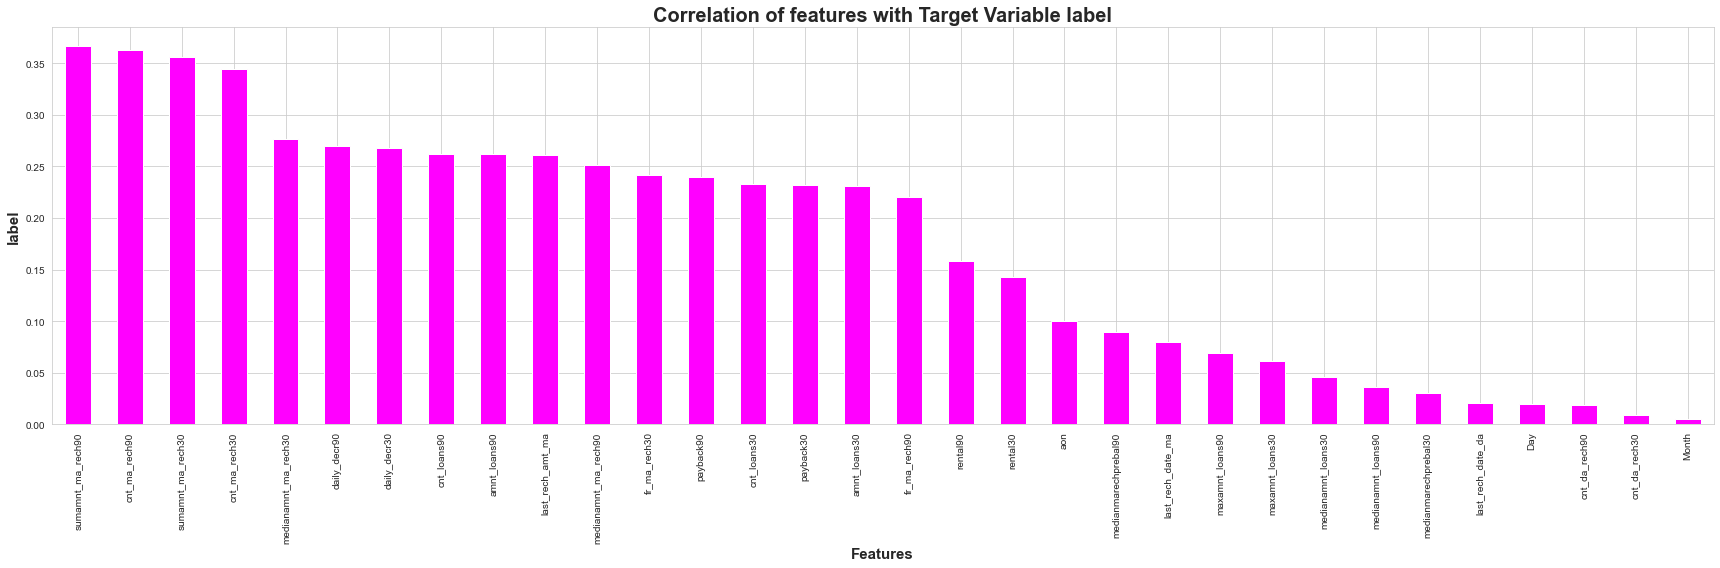

In [39]:
plt.figure(figsize = (24,8))
df.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('label',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

# 4.Standard Scaling

In [40]:
# Splitting data in target and dependent feature
X = df.drop(['label'], axis =1)
Y = df['label']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# 5. Balancing Imbalanced target feature

In [52]:
df.label.value_counts()

1    183430
0     26162
Name: label, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable

# Balancing using SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
df.shape

(209592, 33)

In [55]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X_scale, Y = oversample.fit_resample(X_scale, Y)

In [56]:
Y.value_counts()

0    183430
1    183430
Name: label, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category

# PCA

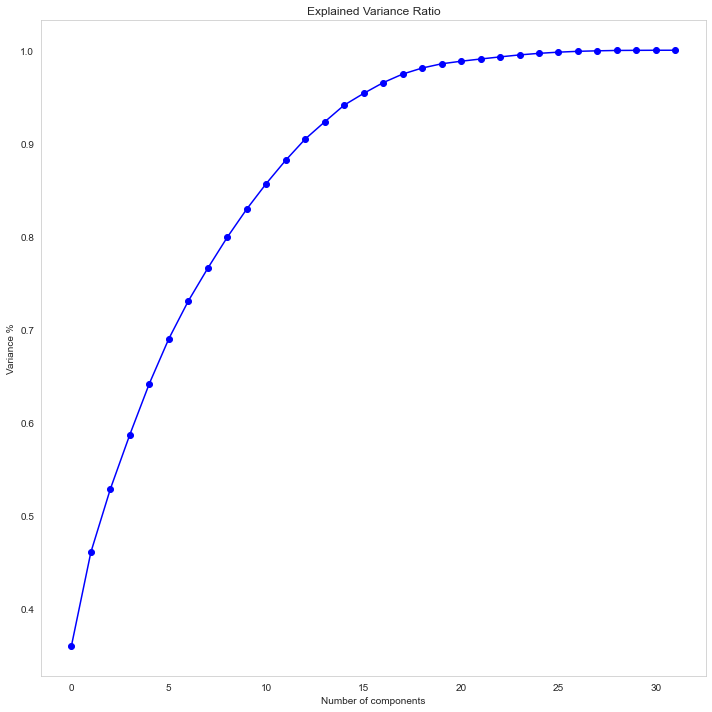

In [57]:
#plot the graph to find the principal components
from sklearn.decomposition import PCA
pca =PCA()
x_pca =pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

# Comment -
AS per the graph, we can see that 12 principal components attribute for 90% of variation in the data.  We shall pick the first 15 components for our prediction

In [58]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

# Machine Learning Model Building

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=99, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (245796, 15)
Training target vector size: (245796,)
Test feature matrix size: (121064, 15)
Test target vector size: (121064,)


# Logistic Regression

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=62, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7596725698803939


Confusion matrix of Logistics Regression : 
 [[46014 14444]
 [14651 45955]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     60458
           1       0.76      0.76      0.76     60606

    accuracy                           0.76    121064
   macro avg       0.76      0.76      0.76    121064
weighted avg       0.76      0.76      0.76    121064



# Cross Validation of Logistics Regression

In [62]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg,x_new, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.75855912 0.75997656 0.76020825 0.76000382 0.76138036]
Mean CV Score : 0.7600256228534046
Std deviation : 0.0008969034283579747


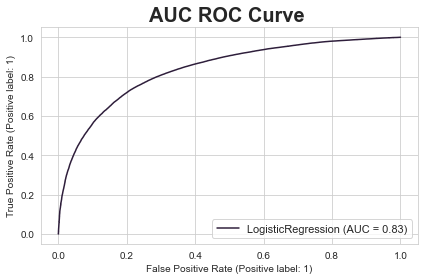

Auc Score :
 0.7596743009839705


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(log_reg,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AUC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, log_reg.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Decision Tree Classifier

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=62, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8590662789929293


Confusion matrix of Decision Tree Classifier : 
 [[53425  7033]
 [10029 50577]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     60458
           1       0.88      0.83      0.86     60606

    accuracy                           0.86    121064
   macro avg       0.86      0.86      0.86    121064
weighted avg       0.86      0.86      0.86    121064



# Cross Validation of Decision Tree Classifier

In [65]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc,x_new, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.87027749 0.86895546 0.87138145 0.86782424 0.8716813 ]
Mean CV Score : 0.8700239873521234
Std deviation : 0.0014583754724097502


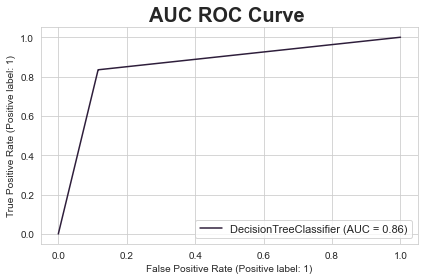

Auc Score :
 0.8590963217646205


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dtc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AUC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, dtc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Random Forest Classifier 

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=62, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.9265760259036543


Confusion matrix of Random Forest Classifier : 
 [[56848  3610]
 [ 5279 55327]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     60458
           1       0.94      0.91      0.93     60606

    accuracy                           0.93    121064
   macro avg       0.93      0.93      0.93    121064
weighted avg       0.93      0.93      0.93    121064



# Cross Validation of Decision Tree Classifier

In [68]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc,x_new, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.9325492  0.93654255 0.93558851 0.93561577 0.93459358]
Mean CV Score : 0.9349779207327046
Std deviation : 0.0013619197130945327


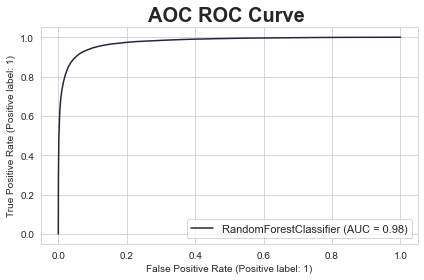

Auc Score :
 0.9265927696160255


In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AUC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, rfc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Extra Tree Classifier

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9412294323663517


Confusion matrix of Extra Trees Classifier : 
 [[57671  2787]
 [ 4328 56278]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     60458
           1       0.95      0.93      0.94     60606

    accuracy                           0.94    121064
   macro avg       0.94      0.94      0.94    121064
weighted avg       0.94      0.94      0.94    121064



In [71]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc,x_new, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94928583 0.94891784 0.94865889 0.94725508 0.94909502]
Mean CV Score : 0.9486425339366515
Std deviation : 0.0007238312248910542


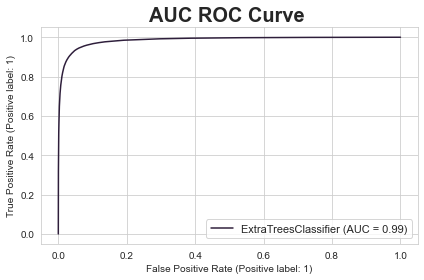

Auc Score :
 0.9414683625209942


In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AUC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'] }

In [75]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 1/5; 1/6] END criterion=gini, max_features=auto;, score=0.933 total time=  36.3s
[CV 2/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 2/5; 1/6] END criterion=gini, max_features=auto;, score=0.934 total time=  33.4s
[CV 3/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 3/5; 1/6] END criterion=gini, max_features=auto;, score=0.932 total time=  34.3s
[CV 4/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 4/5; 1/6] END criterion=gini, max_features=auto;, score=0.933 total time=  33.2s
[CV 5/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 5/5; 1/6] END criterion=gini, max_features=auto;, score=0.931 total time=  33.4s
[CV 1/5; 2/6] START criterion=gini, max_features=sqrt...........................
[CV 1/5; 2/6] END criterion=g

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=10)

In [76]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'sqrt'}

# Extra Tree Classifier model based on Hyper Parameter Tuning

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier(criterion='gini', max_features = 'auto')
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9414524548998877


Confusion matrix of Extra Trees Classifier : 
 [[57706  2752]
 [ 4336 56270]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     60458
           1       0.95      0.93      0.94     60606

    accuracy                           0.94    121064
   macro avg       0.94      0.94      0.94    121064
weighted avg       0.94      0.94      0.94    121064



In [78]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc,x_new, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier(max_features='auto') :

CVScore : [0.94973559 0.95047157 0.94889058 0.94766396 0.94849534]
Mean CV Score : 0.9490514092569373
Std deviation : 0.0009741725631610311


**We can see that hyper parameter tuning leads to increase in accuracy compare to default parameter from 0.9417 to 0.9497 . We will use New Extra tree classifer model final model.**

# Final Model AOC ROC

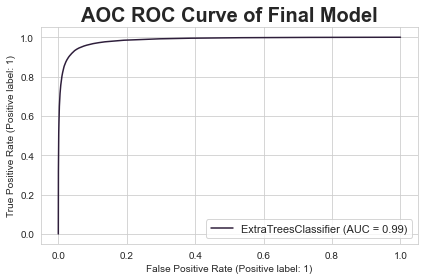

Auc Score :
 0.9414683625209942


In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving Final Model

In [80]:
import joblib
joblib.dump(etc,'Micro_Credit_Defaulter_Final.pkl')

['Micro_Credit_Defaulter_Final.pkl']

# Prediction Using Final Model

In [81]:
# Prediction
prediction = etc.predict(X_test)

In [ ]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred